In [ ]:
#===========Importing Neccessaryy library and module========


#==========Importing numpy for multidimensional array
import numpy as np

#=========importing matplotlib for Plotting Graph==========
import matplotlib.pyplot as plt

#=========Loadig model selection for splitting the dataset==============
from sklearn.model_selection import train_test_split

#=========Importing models for classification efficiency
from sklearn.metrics import accuracy_score, classification_report

#========Importing library for dealing with DataFrame=====
import pandas as pd
#=========To fill data====================
from sklearn.impute import KNNImputer

In [ ]:
#========Loading the dataset======
data = pd.read_csv('train.csv')

In [ ]:
data.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [ ]:
data['Gender']

0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
609    Female
610      Male
611      Male
612      Male
613    Female
Name: Gender, Length: 614, dtype: object

In [ ]:
data.drop('Loan_ID',inplace=True,axis=1)

## **Encoding**

In [ ]:
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})
data['Married'] = data['Married'].map({'Yes': 1, 'No': 0})
data['Education'] = data['Education'].map({'Graduate': 1, 'Not Graduate': 0})
data['Self_Employed'] = data['Self_Employed'].map({'Yes': 1, 'No': 0})
data['Property_Area'] = data['Property_Area'].map({'Urban': 2, 'Semiurban': 1, 'Rural':0})
data['Loan_Status'] = data['Loan_Status'].map({'Y': 1, 'N': 0})
data['Dependents'] = data['Dependents'].map({'3+': 3, '2': 2,'1':1, '0':0})

In [ ]:
data

Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1.0      0.0         0.0          1            0.0             5849   
1       1.0      1.0         1.0          1            0.0             4583   
2       1.0      1.0         0.0          1            1.0             3000   
3       1.0      1.0         0.0          0            0.0             2583   
4       1.0      0.0         0.0          1            0.0             6000   
..      ...      ...         ...        ...            ...              ...   
609     0.0      0.0         0.0          1            0.0             2900   
610     1.0      1.0         3.0          1            0.0             4106   
611     1.0      1.0         1.0          1            0.0             8072   
612     1.0      1.0         2.0          1            0.0             7583   
613     0.0      0.0         0.0          1            1.0             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                  0.0         NaN             360.0             1.0   
1               1508.0       128.0             360.0             1.0   
2                  0.0        66.0             360.0             1.0   
3               2358.0       120.0             360.0             1.0   
4                  0.0       141.0             360.0             1.0   
..                 ...         ...               ...             ...   
609                0.0        71.0             360.0             1.0   
610                0.0        40.0             180.0             1.0   
611              240.0       253.0             360.0             1.0   
612                0.0       187.0             360.0             1.0   
613                0.0       133.0             360.0             0.0   

     Property_Area  Loan_Status  
0                2            1  
1                0            0  
2                2            1  
3                2            1  
4                2            1  
..             ...          ...  
609              0            1  
610              0            1  
611              2            1  
612              2            1  
613              1            0  

[614 rows x 12 columns]

In [ ]:
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## **KNN Imputer to fill NaN values**

In [ ]:
for i in data:
  imputer = KNNImputer(n_neighbors=2)
  imputed_values = imputer.fit_transform(data[[i]])

  # Updating the DataFrame with the imputed values
  data[[i]] = imputed_values


In [ ]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## **Feature Engineering adding new features**

In [ ]:
total=[]
for i in range(len(data)):
  t=data['ApplicantIncome'][i]+data['CoapplicantIncome'][i]
  total.append(t)
data['Total Income']=total

In [ ]:
family=[]
for i in range(len(data)):
  f=data['Dependents'][i]+1
  family.append(f)
data['Total Family']=family

In [ ]:
l_ratio=[]
for i in range(len(data)):
  ratio=data['Total Income'][i]/data['LoanAmount'][i]
  l_ratio.append(ratio)
data['Loan Ratio to Total Income']=l_ratio

## **LOG TRANSFORMATION**

In [ ]:
data['ApplicantIncome'] = data['ApplicantIncome'].apply(lambda x: np.log(x) if x > 0 else 0)
data['CoapplicantIncome'] = data['CoapplicantIncome'].apply(lambda x: np.log(x) if x > 0 else 0)
data['LoanAmount'] = data['LoanAmount'].apply(lambda x: np.log(x) if x > 0 else 0)
data['Total Income'] = data['Total Income'].apply(lambda x: np.log(x) if x > 0 else 0)
data['Loan Ratio to Total Income'] = data['Loan Ratio to Total Income'].apply(lambda x: np.log(x) if x > 0 else 0)

## **Covariance and Visualization**

In [ ]:
data_cov=data.cov()
data_cov

Gender   Married  Dependents  Education  \
Gender                      0.148659  0.066915    0.065905  -0.007806   
Married                     0.066915  0.226340    0.162242  -0.002795   
Dependents                  0.065905  0.162242    1.005444  -0.024173   
Education                  -0.007806 -0.002795   -0.024173   0.170890   
Self_Employed              -0.001225  0.000302    0.018964   0.001687   
ApplicantIncome             0.020076  0.006070    0.077377   0.048471   
CoapplicantIncome           0.330710  0.588933   -0.016656  -0.069103   
LoanAmount                  0.026576  0.042316    0.077910   0.029430   
Loan_Amount_Term           -1.828519 -3.123695   -6.328737   2.055465   
Credit_History              0.002069  0.000706   -0.016478   0.011266   
Property_Area              -0.007386  0.001092    0.005330   0.021239   
Loan_Status                 0.003510  0.019685    0.003110   0.016473   
Total Income                0.033872  0.039290    0.061617   0.046163   
Total Family                0.065905  0.162242    1.005444  -0.024173   
Loan Ratio to Total Income  0.007295 -0.003026   -0.016293   0.016733   

                            Self_Employed  ApplicantIncome  CoapplicantIncome  \
Gender                          -0.001225         0.020076           0.330710   
Married                          0.000302         0.006070           0.588933   
Dependents                       0.018964         0.077377          -0.016656   
Education                        0.001687         0.048471          -0.069103   
Self_Employed                    0.114921         0.040626          -0.119262   
ApplicantIncome                  0.040626         0.416365          -0.920867   
CoapplicantIncome               -0.119262        -0.920867          15.020895   
LoanAmount                       0.018820         0.157348           0.252159   
Loan_Amount_Term                -0.781117        -1.276794           3.394087   
Credit_History                   0.000444         0.004325           0.003208   
Property_Area                   -0.008089        -0.014982          -0.168334   
Loan_Status                     -0.000353         0.003286           0.108911   
Total Income                     0.033069         0.260389           0.315078   
Total Family                     0.018964         0.077377          -0.016656   
Loan Ratio to Total Income       0.014249         0.103041           0.062919   

                            LoanAmount  Loan_Amount_Term  Credit_History  \
Gender                        0.026576         -1.828519        0.002069   
Married                       0.042316         -3.123695        0.000706   
Dependents                    0.077910         -6.328737       -0.016478   
Education                     0.029430          2.055465        0.011266   
Self_Employed                 0.018820         -0.781117        0.000444   
ApplicantIncome               0.157348         -1.276794        0.004325   
CoapplicantIncome             0.252159          3.394087        0.003208   
LoanAmount                    0.246586          2.766026       -0.004384   
Loan_Amount_Term              2.766026       4143.817292        0.031412   
Credit_History               -0.004384          0.031412        0.122277   
Property_Area                -0.036288         -3.934747       -0.000518   
Loan_Status                  -0.009648         -0.626427        0.087689   
Total Income                  0.177976         -1.941171        0.003651   
Total Family                  0.077910         -6.328737       -0.016478   
Loan Ratio to Total Income   -0.068610         -4.707197        0.008035   

                            Property_Area  Loan_Status  Total Income  \
Gender                          -0.007386     0.003510      0.033872   
Married                          0.001092     0.019685      0.039290   
Dependents                       0.005330     0.003110      0.061617   
Education                        0.021239     0.016473     

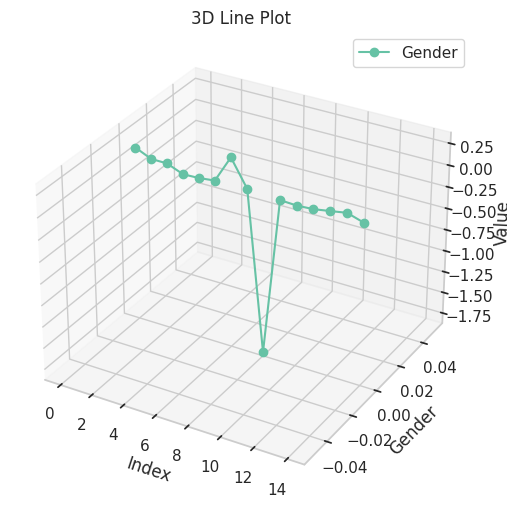

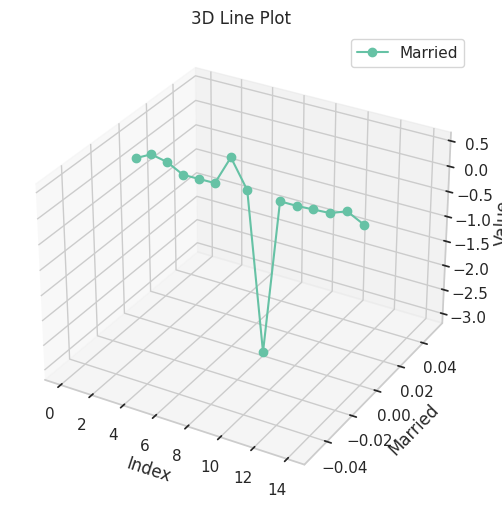

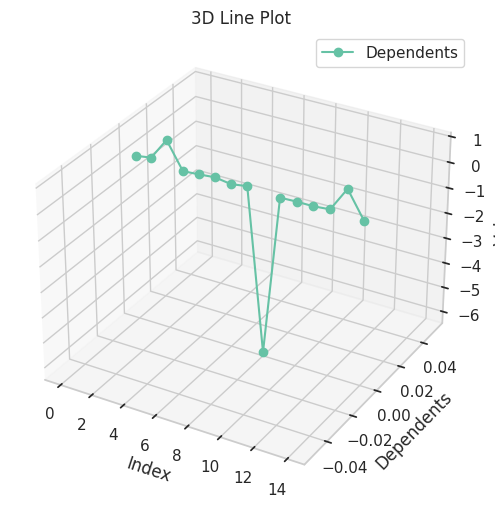

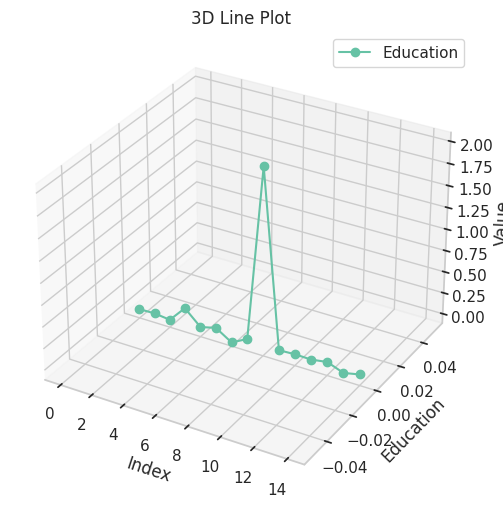

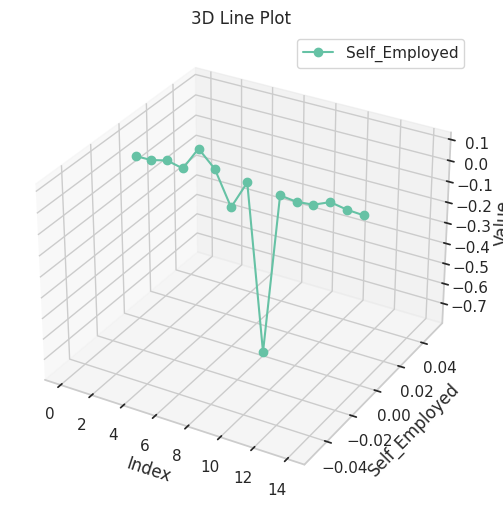

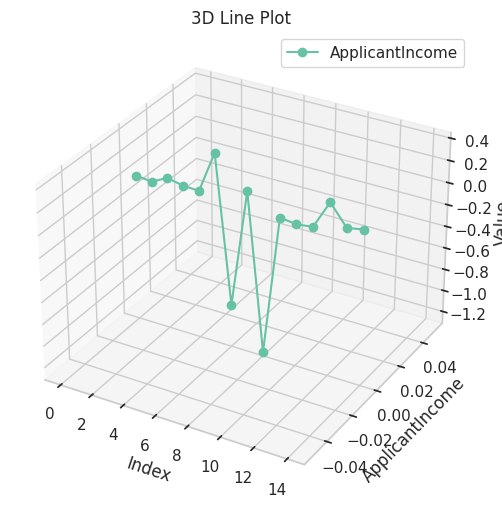

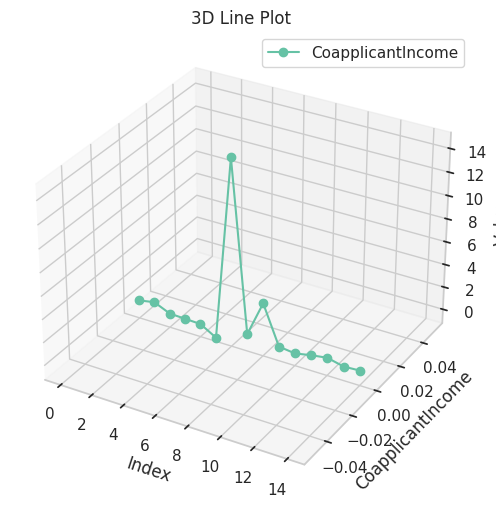

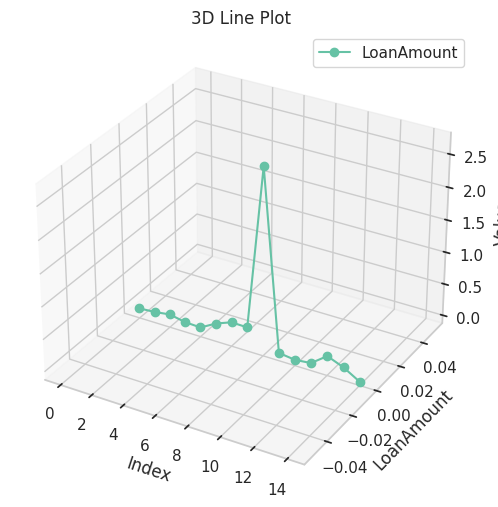

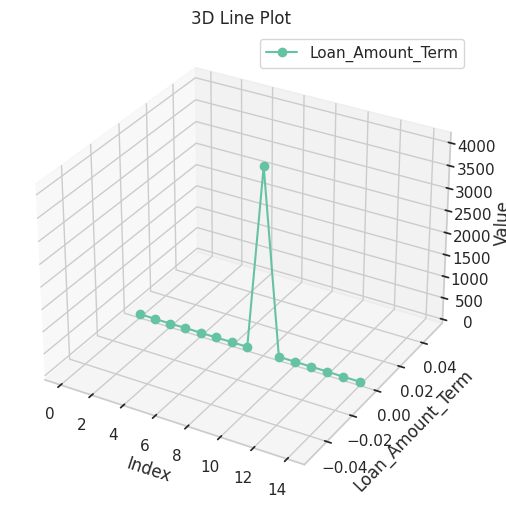

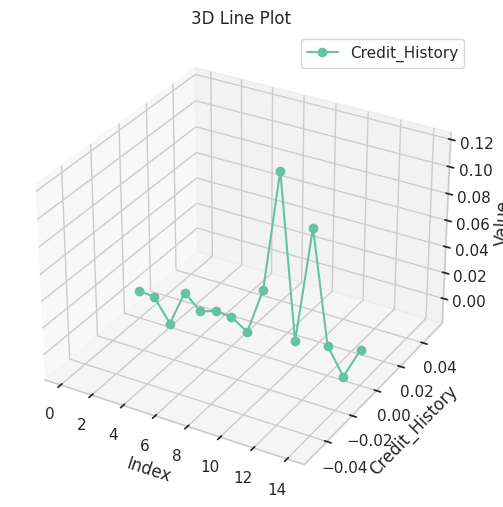

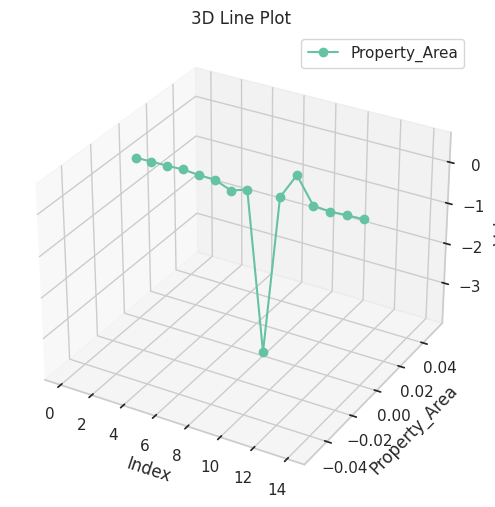

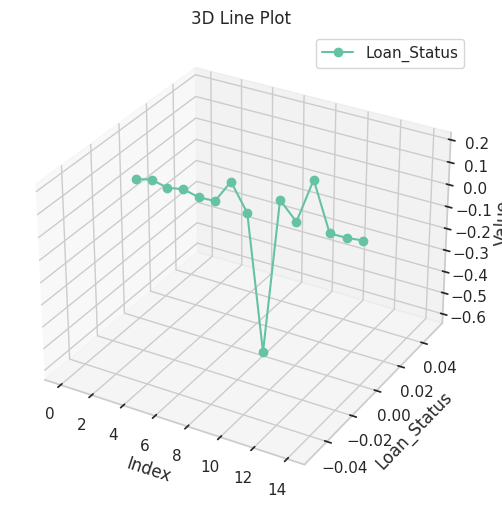

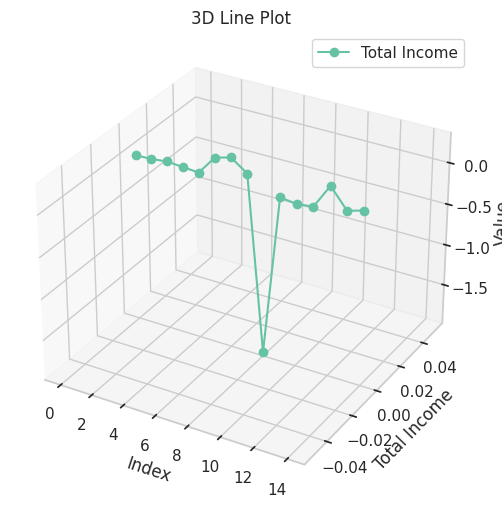

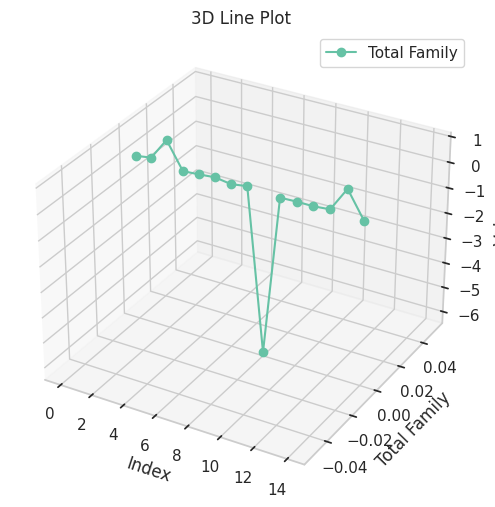

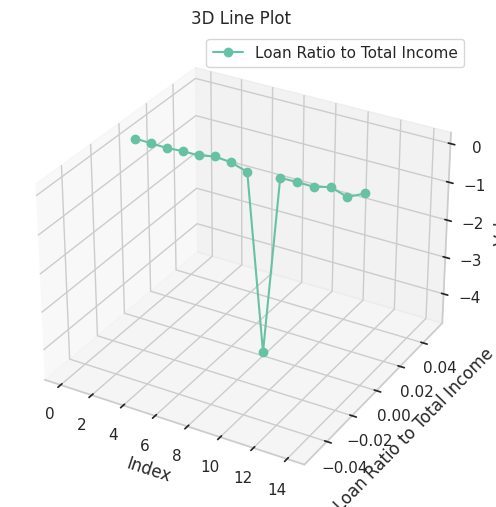

In [ ]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt



for i in data_cov:
  sns.set(style='whitegrid')  # Setting the style
  sns.set_palette('Set2')  # Setting the color palette

  fig = plt.figure(figsize=(10, 6))
  ax = fig.add_subplot(111, projection='3d')

  x = range(len(data_cov))
  y = data_cov[i]

  ax.plot(x, y, zs=0, zdir='y', label=i, marker='o')

  # Set labels and title
  ax.set_xlabel('Index')
  ax.set_ylabel(i)
  ax.set_zlabel('Value')
  ax.set_title('3D Line Plot')

  # Show plot
  plt.legend()
  plt.show()


In [ ]:
data

Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1.0      0.0         0.0        1.0            0.0         8.674026   
1       1.0      1.0         1.0        1.0            0.0         8.430109   
2       1.0      1.0         0.0        1.0            1.0         8.006368   
3       1.0      1.0         0.0        0.0            0.0         7.856707   
4       1.0      0.0         0.0        1.0            0.0         8.699515   
..      ...      ...         ...        ...            ...              ...   
609     0.0      0.0         0.0        1.0            0.0         7.972466   
610     1.0      1.0         3.0        1.0            0.0         8.320205   
611     1.0      1.0         1.0        1.0            0.0         8.996157   
612     1.0      1.0         2.0        1.0            0.0         8.933664   
613     0.0      0.0         0.0        1.0            1.0         8.430109   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0             0.000000    4.986426             360.0             1.0   
1             7.318540    4.852030             360.0             1.0   
2             0.000000    4.189655             360.0             1.0   
3             7.765569    4.787492             360.0             1.0   
4             0.000000    4.948760             360.0             1.0   
..                 ...         ...               ...             ...   
609           0.000000    4.262680             360.0             1.0   
610           0.000000    3.688879             180.0             1.0   
611           5.480639    5.533389             360.0             1.0   
612           0.000000    5.231109             360.0             1.0   
613           0.000000    4.890349             360.0             0.0   

     Property_Area  Loan_Status  Total Income  Total Family  \
0              2.0          1.0      8.674026           1.0   
1              0.0          0.0      8.714568           2.0   
2              2.0          1.0      8.006368           1.0   
3              2.0          1.0      8.505323           1.0   
4              2.0          1.0      8.699515           1.0   
..             ...          ...           ...           ...   
609            0.0          1.0      7.972466           1.0   
610            0.0          1.0      8.320205           4.0   
611            2.0          1.0      9.025456           2.0   
612            2.0          1.0      8.933664           3.0   
613            1.0          0.0      8.430109           1.0   

     Loan Ratio to Total Income  
0                      3.687600  
1                      3.862537  
2                      3.816713  
3                      3.717831  
4                      3.750755  
..                          ...  
609                    3.709786  
610                    4.631325  
611                    3.492066  
612                    3.702556  
613                    3.539760  

[614 rows x 15 columns]

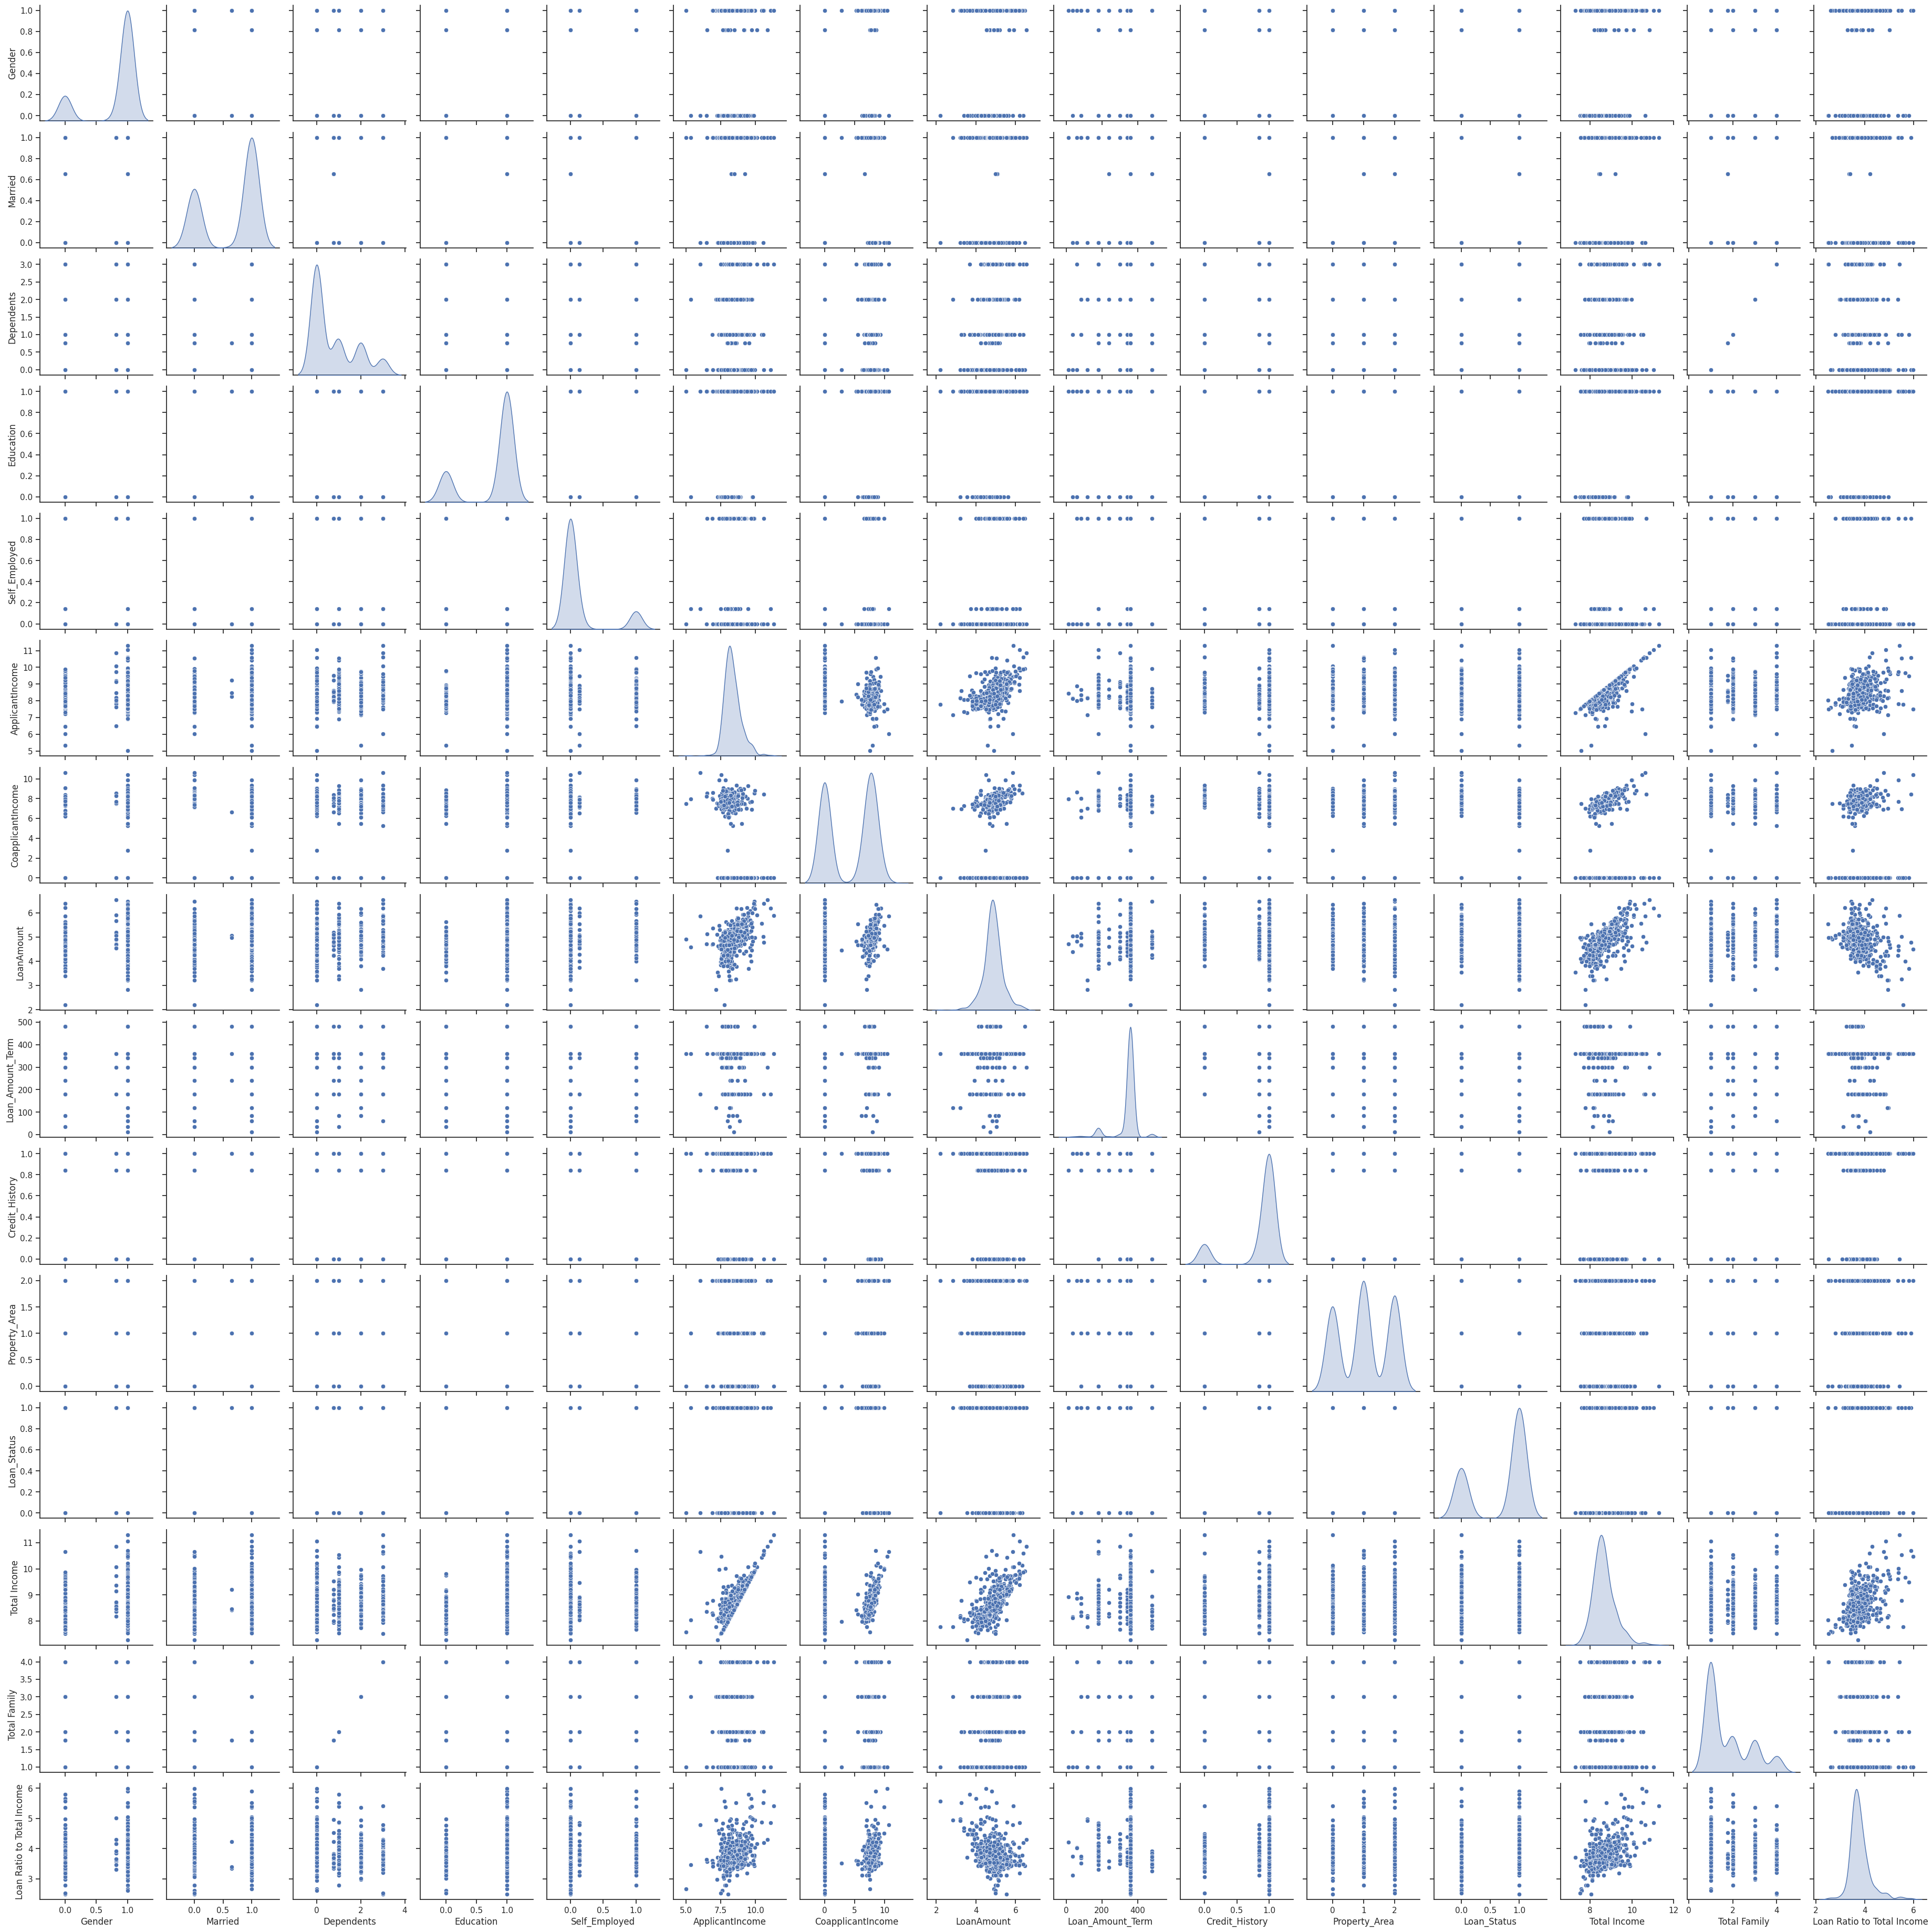

In [ ]:
sns.set_theme(style="ticks")
sns.pairplot(data, diag_kind='kde')
plt.show()

## **Splitting**

In [ ]:
test=data[406:]
data=data[:406]

In [ ]:
test

Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
406     1.0      1.0         0.0        0.0            0.0         7.681099   
407     0.0      0.0         0.0        0.0            0.0         7.702104   
408     1.0      1.0         1.0        1.0            0.0         9.024011   
409     1.0      1.0         3.0        1.0            0.0        11.302204   
410     0.0      0.0         1.0        0.0            1.0         8.260234   
..      ...      ...         ...        ...            ...              ...   
609     0.0      0.0         0.0        1.0            0.0         7.972466   
610     1.0      1.0         3.0        1.0            0.0         8.320205   
611     1.0      1.0         1.0        1.0            0.0         8.996157   
612     1.0      1.0         2.0        1.0            0.0         8.933664   
613     0.0      0.0         0.0        1.0            1.0         8.430109   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
406           7.783224    4.744932             360.0             1.0   
407           0.000000    4.189655             360.0             1.0   
408           0.000000    5.023881             300.0             0.0   
409           0.000000    5.886104             360.0             0.0   
410           0.000000    4.127134             360.0             1.0   
..                 ...         ...               ...             ...   
609           0.000000    4.262680             360.0             1.0   
610           0.000000    3.688879             180.0             1.0   
611           5.480639    5.533389             360.0             1.0   
612           0.000000    5.231109             360.0             1.0   
613           0.000000    4.890349             360.0             0.0   

     Property_Area  Loan_Status  Total Income  Total Family  \
406            2.0          1.0      8.426612           1.0   
407            0.0          1.0      7.702104           1.0   
408            1.0          0.0      9.024011           2.0   
409            0.0          0.0     11.302204           4.0   
410            1.0          0.0      8.260234           2.0   
..             ...          ...           ...           ...   
609            0.0          1.0      7.972466           1.0   
610            0.0          1.0      8.320205           4.0   
611            2.0          1.0      9.025456           2.0   
612            2.0          1.0      8.933664           3.0   
613            1.0          0.0      8.430109           1.0   

     Loan Ratio to Total Income  
406                    3.681680  
407                    3.512450  
408                    4.000130  
409                    5.416100  
410                    4.133100  
..                          ...  
609                    3.709786  
610                    4.631325  
611                    3.492066  
612                    3.702556  
613                    3.539760  

[208 rows x 15 columns]

In [ ]:
x_test=data['Loan_Status']

In [ ]:
data=data.drop('Loan_Status',axis=1)
x_train=data

In [ ]:
y_test=test['Loan_Status']

In [ ]:
test=test.drop('Loan_Status',axis=1)
y_train=test

## **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=120)
model.fit(x_train, x_test)
pred = model.predict(y_train)
LR=accuracy_score(y_test, pred)

In [ ]:
LR

0.8221153846153846

              precision    recall  f1-score   support

         0.0       0.89      0.51      0.65        67
         1.0       0.81      0.97      0.88       141

    accuracy                           0.82       208
   macro avg       0.85      0.74      0.76       208
weighted avg       0.83      0.82      0.81       208



<Axes: >

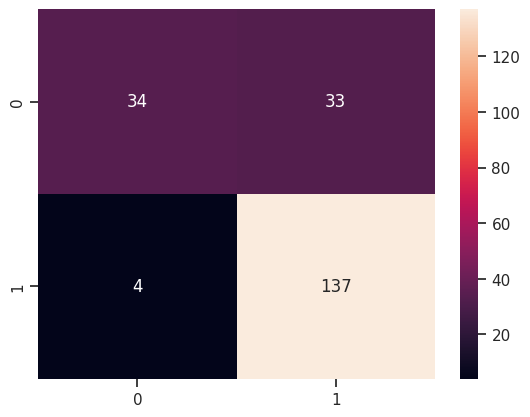

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sn
print(classification_report(y_test,pred))
cf=confusion_matrix(y_test, pred)
sn.heatmap(cf,annot=True,fmt='.0f')

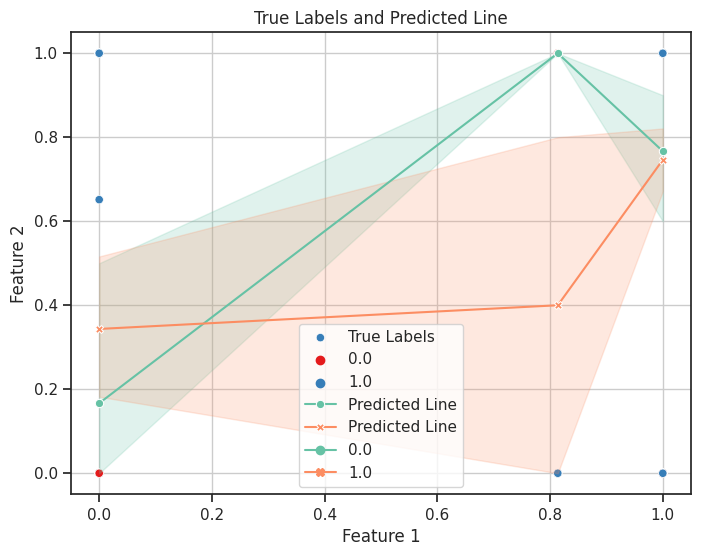

In [ ]:
import seaborn as sns

df_test = y_train.copy()
df_test['True_Labels'] = y_test
df_test['Predicted_Labels'] = pred

plt.figure(figsize=(8, 6))

sns.scatterplot(x='Gender', y='Married', hue='True_Labels', data=df_test, palette='Set1', label='True Labels')

# Line plot for predicted values
sns.lineplot(x='Gender', y='Married', hue='Predicted_Labels', data=df_test, palette='Set2', style='Predicted_Labels', markers=True, dashes=False, legend='full', label='Predicted Line')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('True Labels and Predicted Line')
plt.legend()
plt.grid(True)
plt.show()

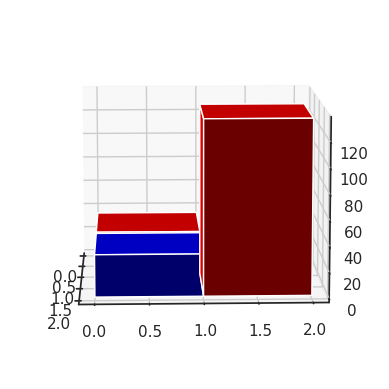

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

# Example confusion matrix (replace this with your actual confusion matrix)
conf_matrix = np.array([[34, 33],
                         [4, 137]])

# Convert the confusion matrix values to a DataFrame for visualization
conf_df = pd.DataFrame(conf_matrix, index=['True Negative', 'True Positive'], columns=['Predicted Negative', 'Predicted Positive'])

# Function to update the plot for each frame
def update(frame):
    ax.view_init(elev=10, azim=frame)

# Create a figure and axes for the animation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Set initial view and plot the 3D-like bars with different colors based on values
ax.view_init(elev=10, azim=0)
x_data, y_data = np.meshgrid(np.arange(conf_df.shape[1]), np.arange(conf_df.shape[0]))
x_data = x_data.flatten()
y_data = y_data.flatten()
z_data = np.zeros_like(x_data)
height = conf_df.values.flatten()

# Define colors based on values in the confusion matrix
colors = np.where(height > 33, 'red', 'blue')  # Example: using red for values greater than 25, otherwise blue

# Plotting the bars with different colors
for i in range(len(x_data)):
    ax.bar3d(x_data[i], y_data[i], z_data[i], 1, 1, height[i], color=colors[i])

# Create animation by rotating the plot 360 degrees
ani = FuncAnimation(fig, update, frames=np.arange(0, 360, 2), interval=100)
ani.save('confusion_matrix_rotation.gif', writer='pillow', fps=30)
plt.show()


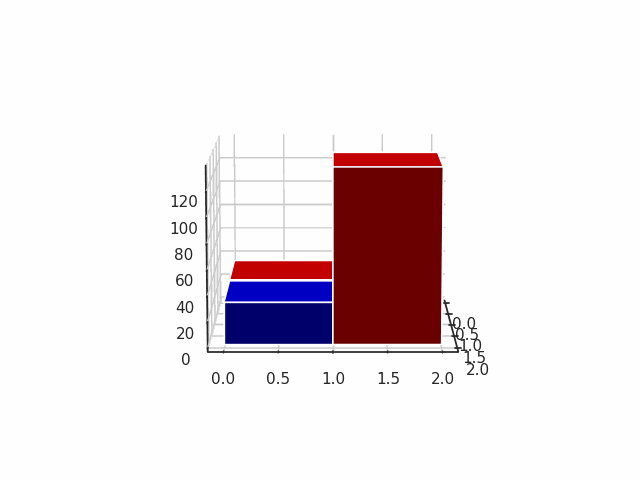

In [ ]:
from IPython.display import Image
Image(filename='confusion_matrix_rotation.gif')